In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from time import time

sns.set_style('darkgrid')        

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
train_df.shape

(381109, 12)

In [4]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
train_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
train_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

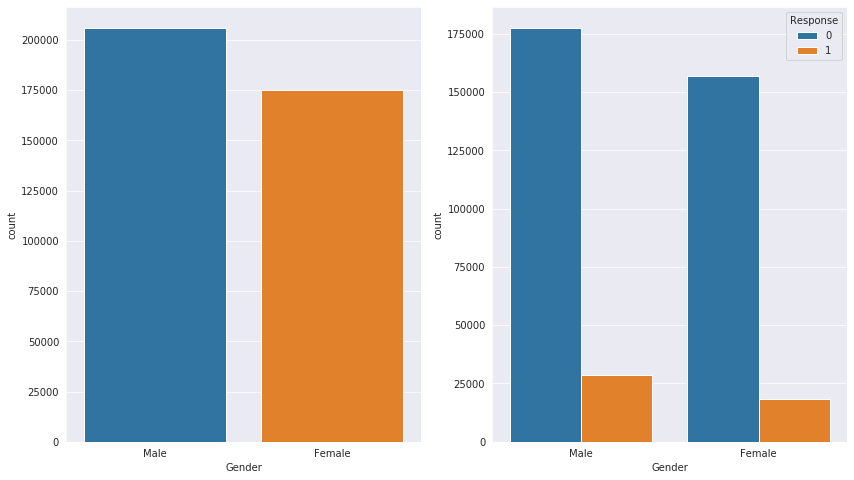

In [7]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot(x='Gender', data=train_df, ax=ax[0])
sns.countplot(x='Gender', hue='Response', data=train_df, ax=ax[1])

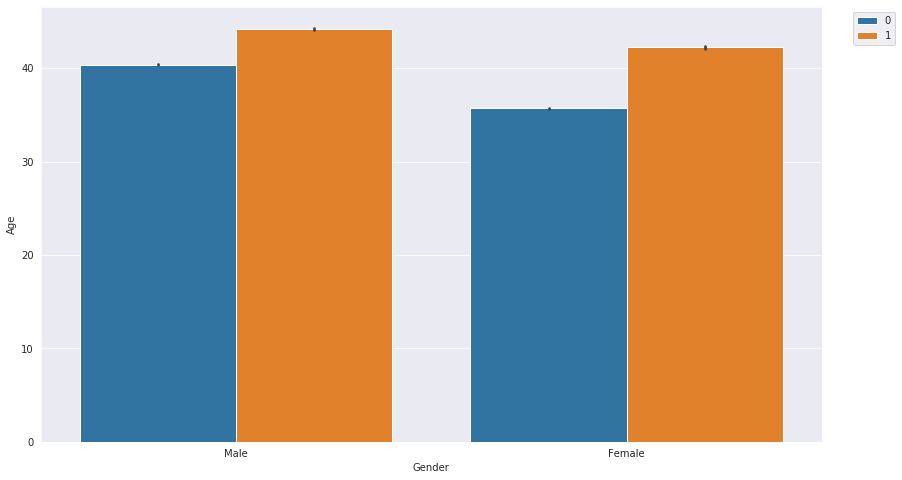

In [8]:
plt.figure(figsize=(14,8))
sns.barplot(x='Gender', y='Age', hue='Response', data=train_df)
plt.legend(loc='upper right', bbox_to_anchor=(1.1,1.0))

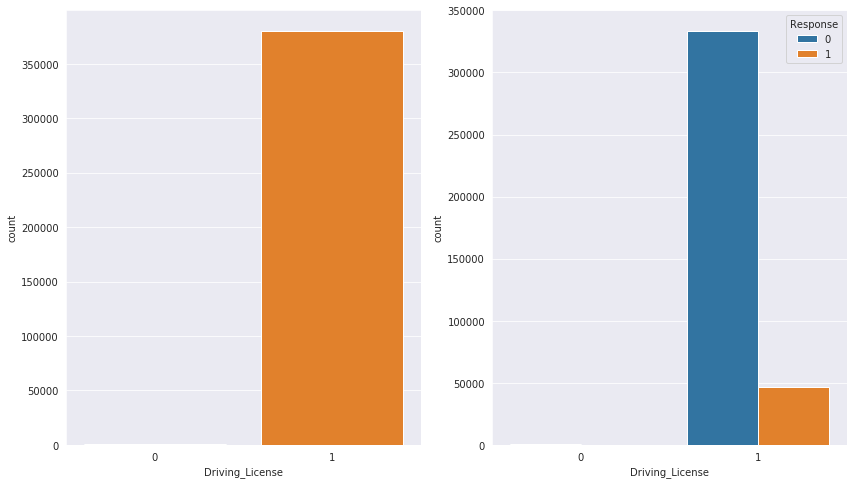

In [9]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot('Driving_License', data=train_df, ax=ax[0])
sns.countplot('Driving_License', hue='Response', data=train_df, ax=ax[1])

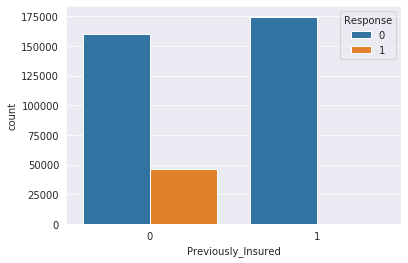

In [10]:
sns.countplot('Previously_Insured', hue='Response', data=train_df)

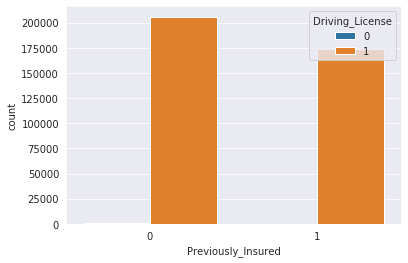

In [11]:
sns.countplot('Previously_Insured', hue='Driving_License', data=train_df)

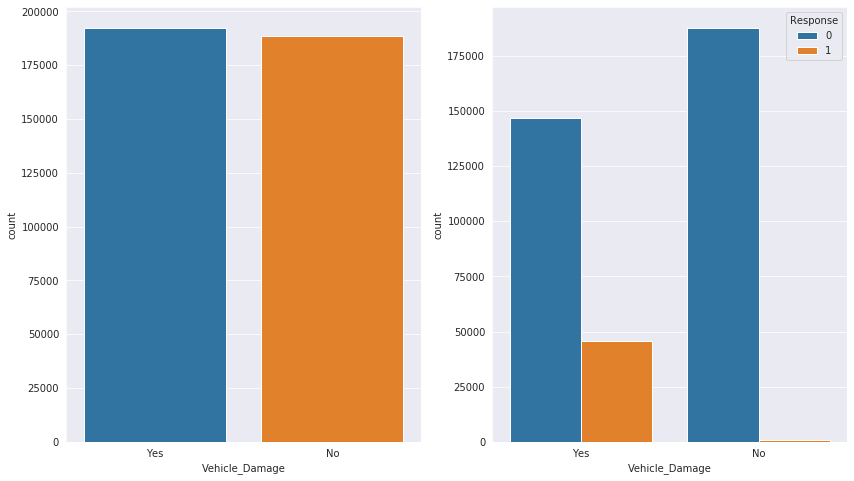

In [12]:
fig, ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot('Vehicle_Damage', data=train_df, ax=ax[0])
sns.countplot('Vehicle_Damage', hue='Response', data=train_df, ax=ax[1])

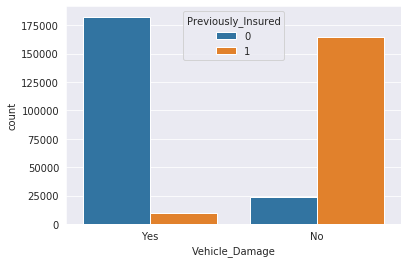

In [13]:
sns.countplot('Vehicle_Damage', hue='Previously_Insured', data=train_df)

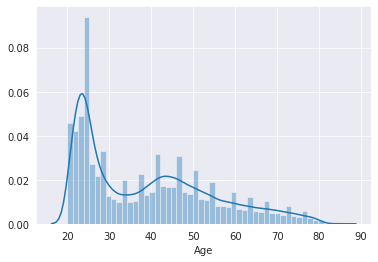

In [14]:
sns.distplot(train_df['Age'])

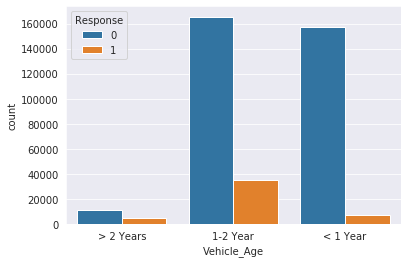

In [15]:
sns.countplot('Vehicle_Age', hue='Response', data=train_df)

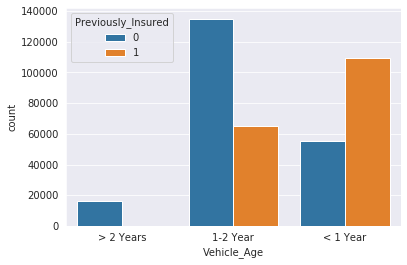

In [16]:
sns.countplot('Vehicle_Age', hue='Previously_Insured', data=train_df)

(0, 100000)

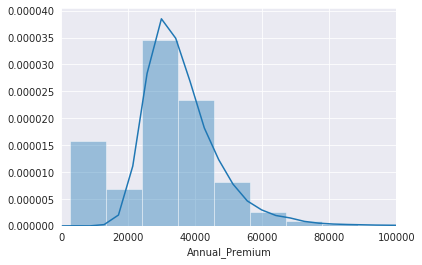

In [17]:
sns.distplot(train_df['Annual_Premium'])
plt.xlim([0,100000])

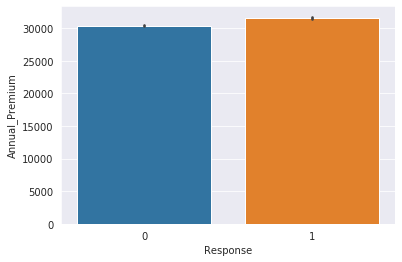

In [18]:
sns.barplot(x='Response', y='Annual_Premium', data=train_df)

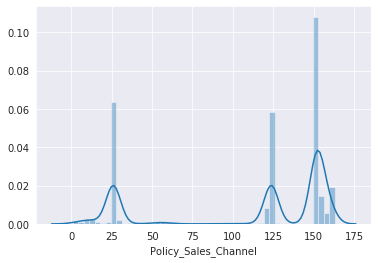

In [24]:
sns.distplot(train_df['Policy_Sales_Channel'])

In [25]:
train_df['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

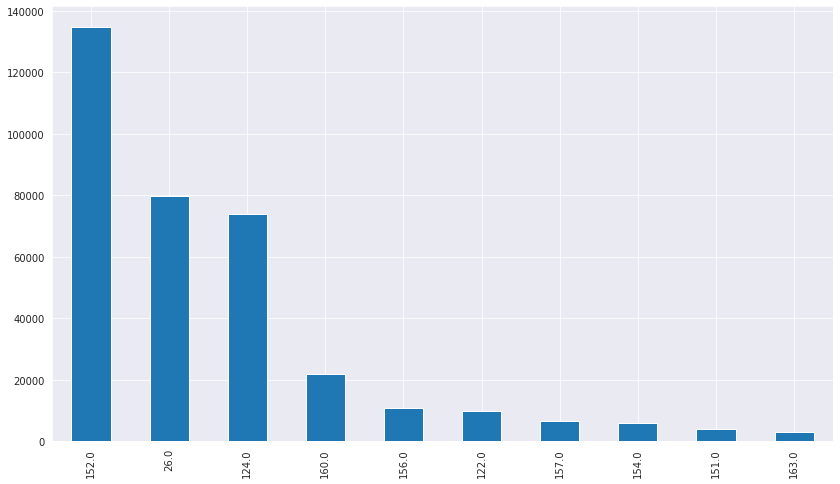

In [41]:
train_df['Policy_Sales_Channel'].value_counts().head(10).plot(kind='bar', figsize=(14,8))

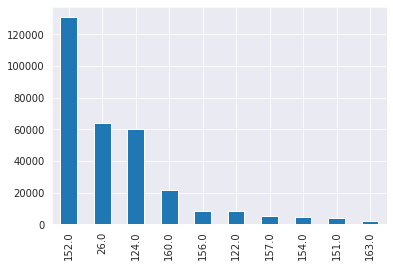

In [54]:
train_df[train_df['Response']==0]['Policy_Sales_Channel'].value_counts().head(10).plot(kind='bar')

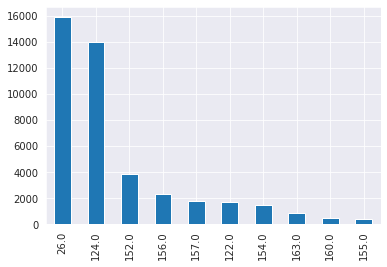

In [55]:
train_df[train_df['Response']==1]['Policy_Sales_Channel'].value_counts().head(10).plot(kind='bar')

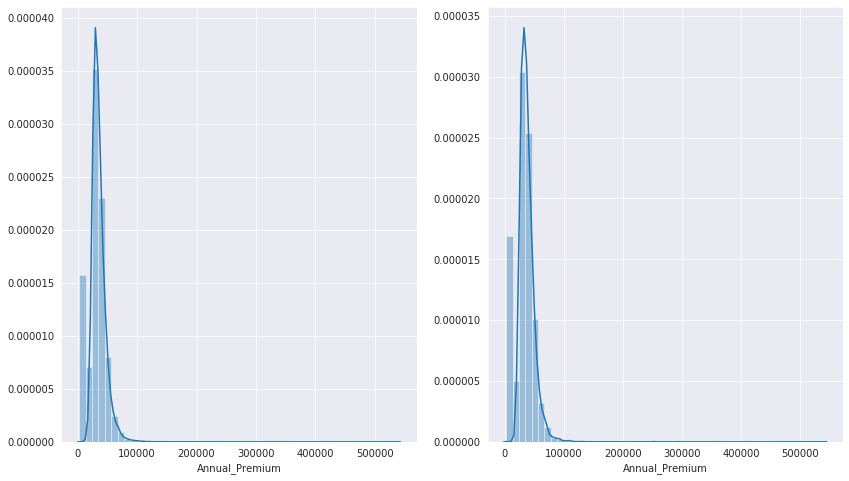

In [62]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.distplot(train_df[train_df['Response']==0]['Annual_Premium'], ax=ax[0])
sns.distplot(train_df[train_df['Response']==1]['Annual_Premium'], ax=ax[1])
#ax[0].set_xlim([0,10000])
#ax[1].set_xlim([0,10000])

In [67]:
train_df[train_df['Response']==0]['Annual_Premium'].mean()

30419.16027559891

In [68]:
train_df[train_df['Response']==1]['Annual_Premium'].mean()

31604.092742453435

In [69]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

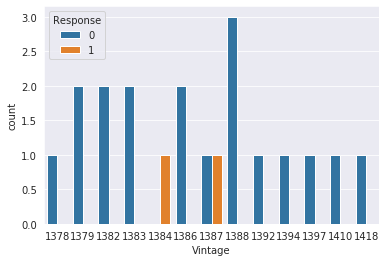

In [73]:
sns.countplot(train_df['Vintage'].value_counts().head(20), hue=train_df['Response'])

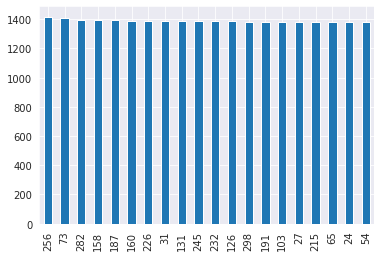

In [78]:
train_df['Vintage'].value_counts().head(20).plot(kind='bar')

In [79]:
old_20_cust = train_df['Vintage'].value_counts().head(20).index
old_20_cust

Int64Index([256,  73, 282, 158, 187, 160, 226,  31, 131, 245, 232, 126, 298,
            191, 103,  27, 215,  65,  24,  54],
           dtype='int64')

In [82]:
sub_df = train_df[train_df['Vintage'].isin(old_20_cust)]

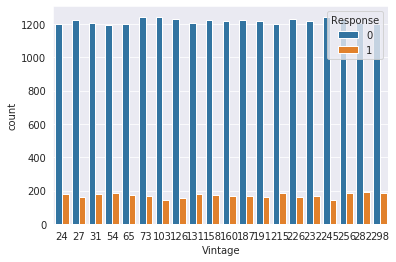

In [84]:
sns.countplot('Vintage', hue='Response', data=sub_df)

In [85]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [87]:
#train_df['Region_Code'].value_counts()

In [92]:
train_df.columns[1:]

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [93]:
subset = train_df.columns[1:]
train_df[train_df.duplicated(subset=subset)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
35754,35755,Male,23,1,15.0,0,< 1 Year,No,2630.0,152.0,173,0
41515,41516,Male,39,1,30.0,0,1-2 Year,Yes,2630.0,124.0,27,0
43618,43619,Male,40,1,28.0,1,1-2 Year,No,2630.0,124.0,209,0
44049,44050,Male,39,1,28.0,0,1-2 Year,Yes,2630.0,124.0,64,0
44203,44204,Male,44,1,28.0,0,> 2 Years,Yes,2630.0,124.0,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...
379273,379274,Male,58,1,30.0,1,1-2 Year,No,2630.0,152.0,150,0
379451,379452,Male,41,1,30.0,0,1-2 Year,Yes,2630.0,156.0,111,0
379788,379789,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,42,0
380673,380674,Female,37,1,28.0,0,1-2 Year,Yes,2630.0,156.0,176,0


In [3]:
final_train_df = train_df.drop('id', axis=1)

In [4]:
final_train_df.drop_duplicates(inplace=True)

In [5]:
final_train_df.shape

(380840, 11)

In [103]:
final_train_df.select_dtypes(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [105]:
train_df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
final_train_df.replace({'Male':0, 'Female':1, 'No':0, 'Yes':1}, inplace=True)
final_train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [8]:
final_train_df.shape

(380840, 11)

In [7]:
X = pd.get_dummies(final_train_df, drop_first=True).drop('Response', axis=1)
y = final_train_df['Response']

In [116]:
#X.head()

<AxesSubplot:>

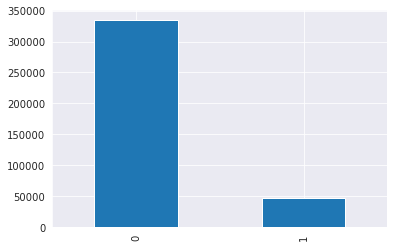

In [8]:
y.value_counts().plot(kind='bar')

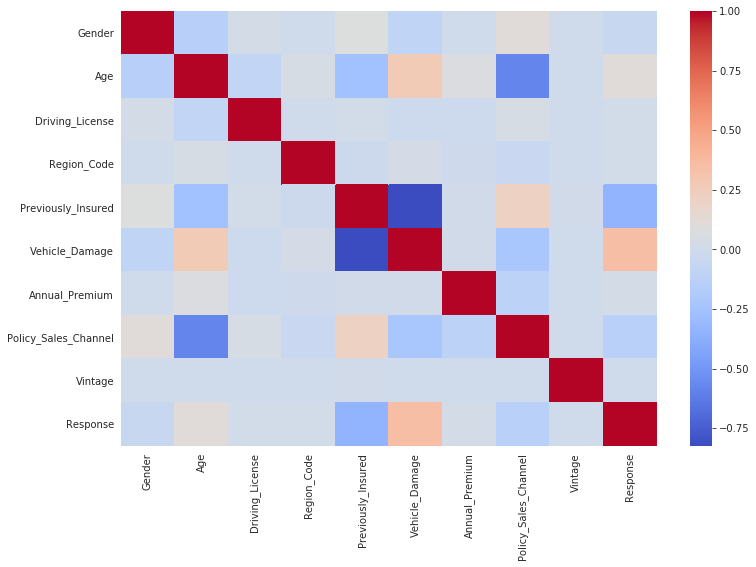

In [10]:
corr_df = final_train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, cmap='coolwarm')

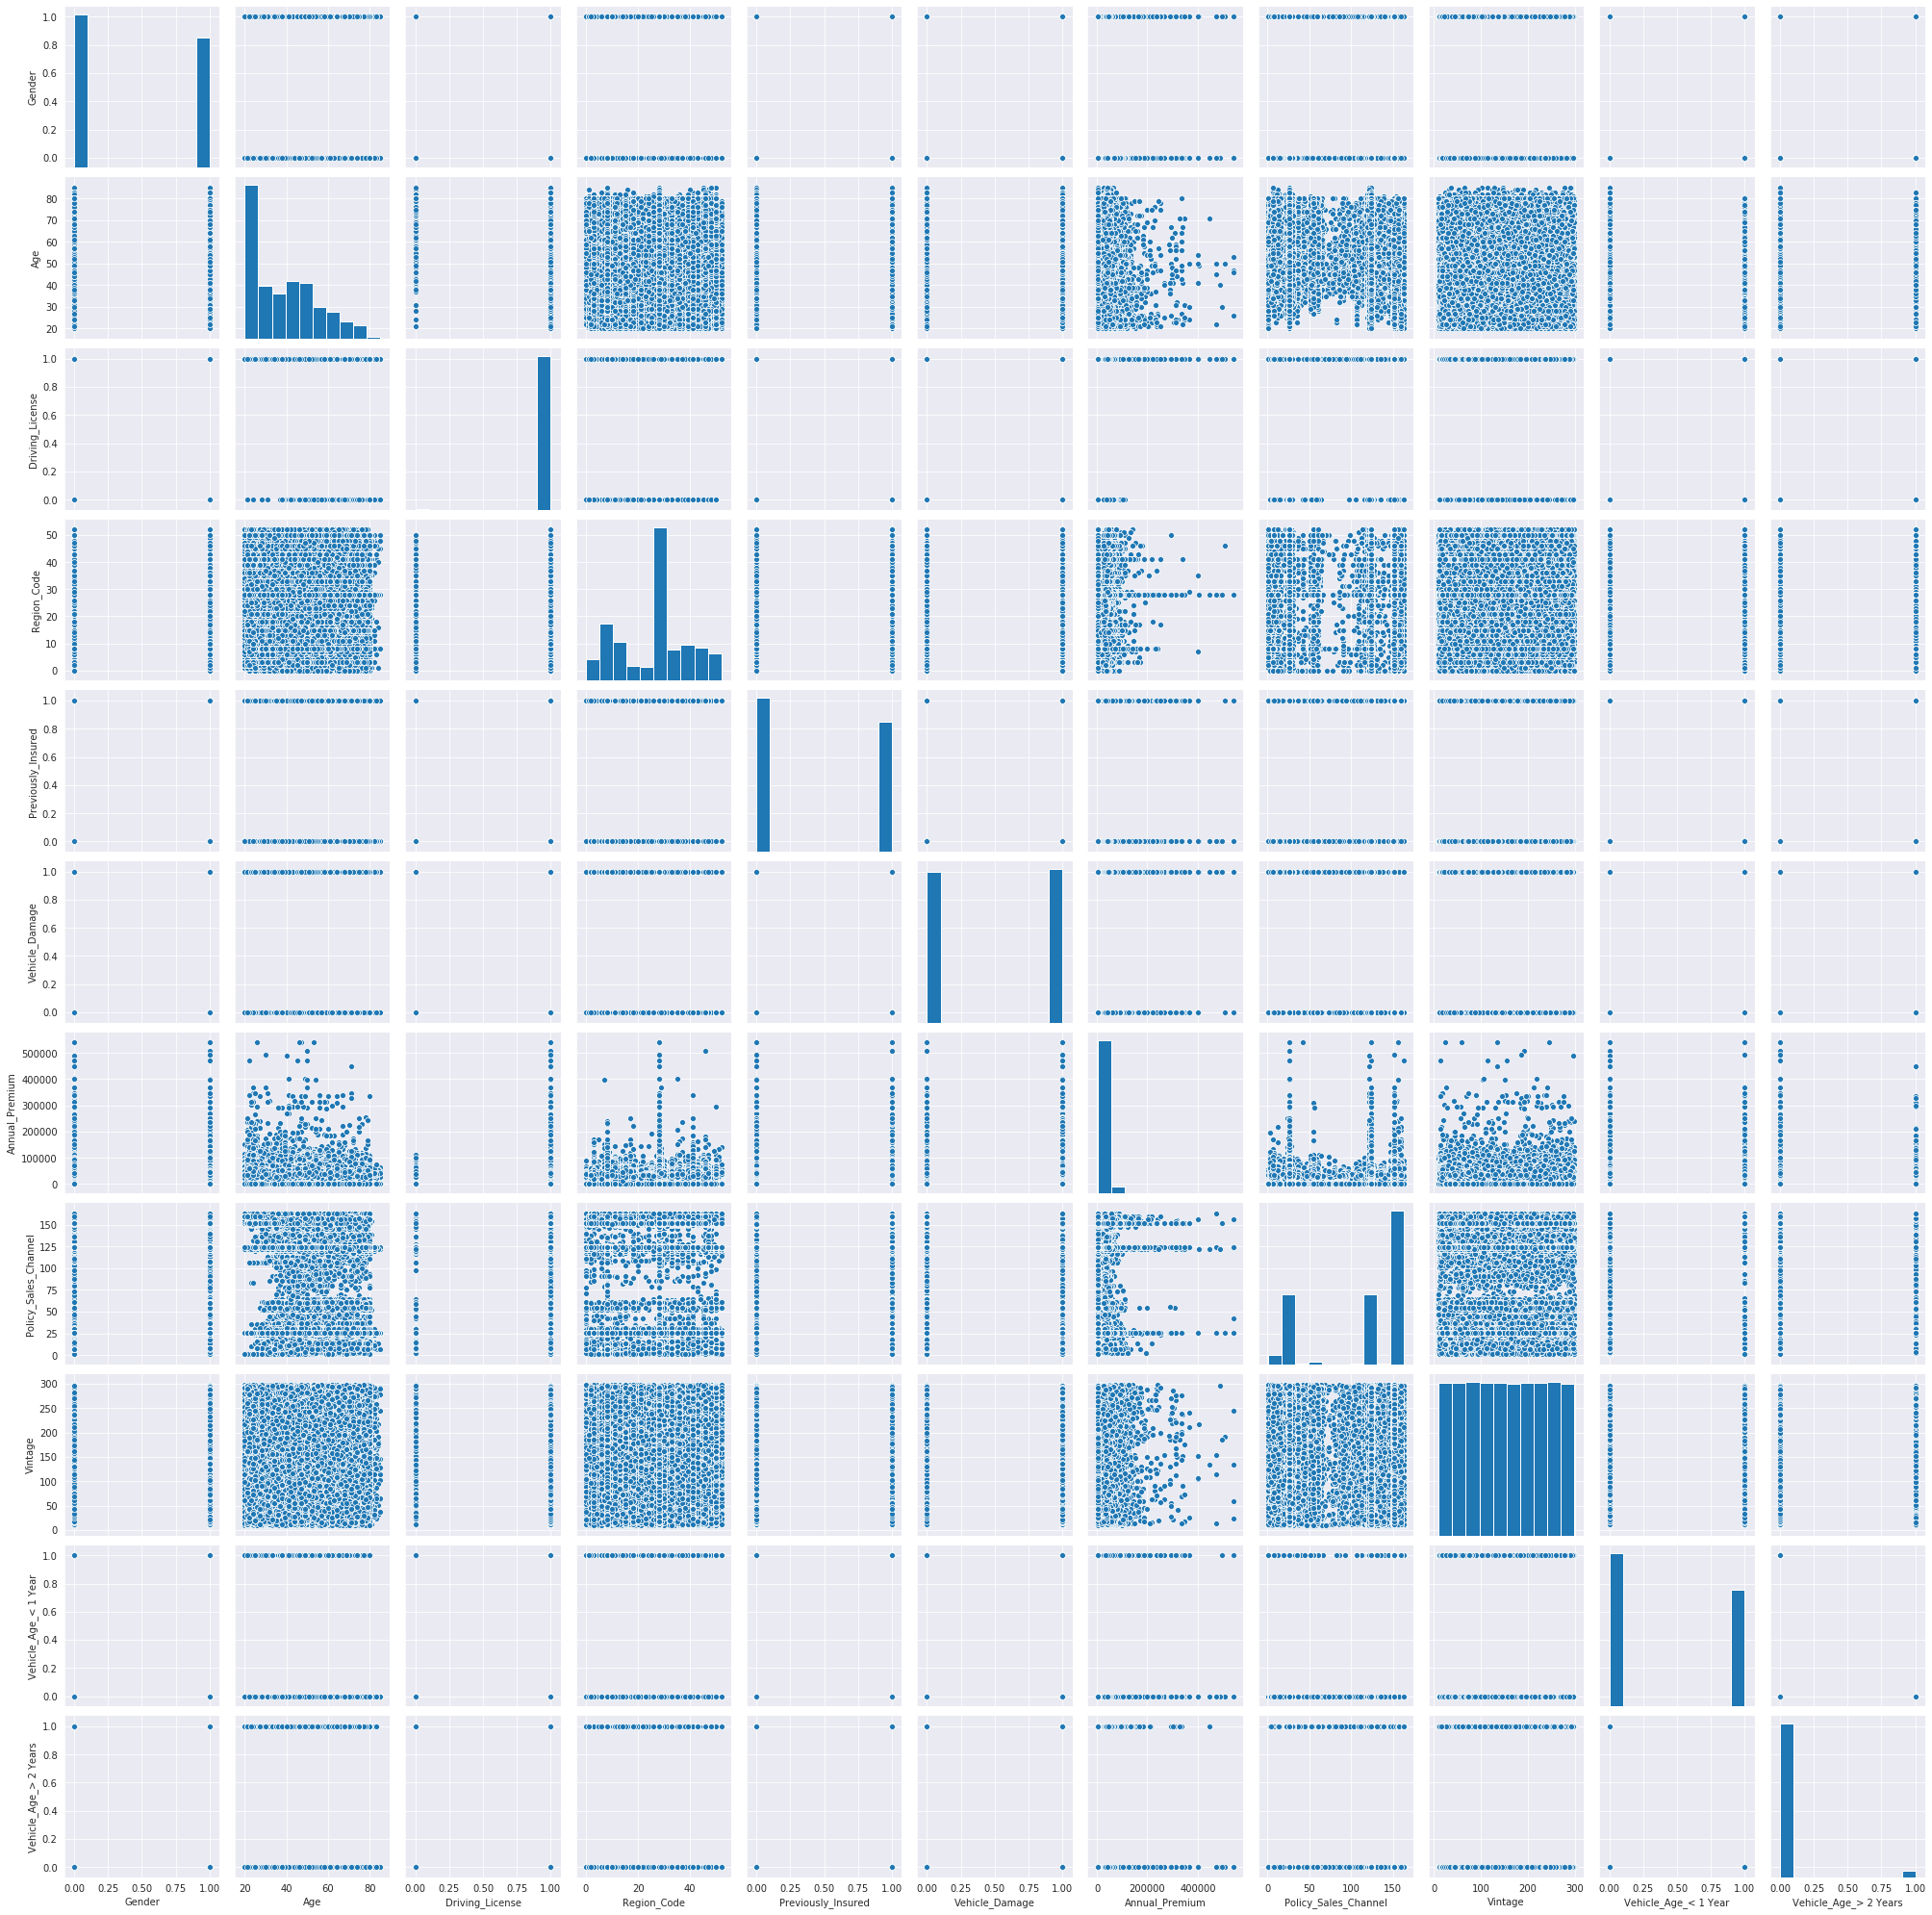

In [11]:
sns.pairplot(X)

In [13]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,1,28.0,0,1,40454.0,26.0,217,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,1,0


In [14]:
X.dtypes

Gender                     int64
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Vehicle_Age_< 1 Year       uint8
Vehicle_Age_> 2 Years      uint8
dtype: object

In [11]:
y.value_counts(normalize=True)

0    0.877416
1    0.122584
Name: Response, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape

((266588, 11), (114252, 11))

In [10]:
y_train.value_counts(normalize=True)

0    0.877384
1    0.122616
Name: Response, dtype: float64

In [11]:
y_test.value_counts(normalize=True)

0    0.87749
1    0.12251
Name: Response, dtype: float64

In [12]:
def build_pipeline(clf):
    
    """
    
    
    """
    
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.5)
    scaler = StandardScaler()
    
    pipeline = Pipeline([
                        ('over', over),
                        ('under', under),
                        ('scaler', scaler),
                        ('clf', clf)
                       ])
    return pipeline

In [13]:
clf_list = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), 
            AdaBoostClassifier(), XGBClassifier()]



# SVC(probability=True),
#             {
#              'clf__C':[0.01, 0.05, 0.1],
#              'clf__kernel':['linear', 'rbf', 'sigmoid'],  
#              'clf__class_weight':[None, 'balanced']      
#             },

In [14]:
param_list = [
             {
              'clf__C':[0.01, 0.05, 0.1, 0.3],
              'clf__class_weight':[None, 'balanced']                
             },
             {
              'clf__n_neighbors':[5, 10, 15, 20],
              'clf__weights':['uniform', 'distance']   
             },
             {
              'clf__n_estimators':[80, 100, 150],
              'clf__criterion':['gini', 'entropy'],
              'clf__class_weight':[None, 'balanced']   
             },
             {
              'clf__n_estimators':[80, 100, 150],
              'clf__learning_rate':[0.001, 0.01, 0.1]   
             },
             {
              'clf__n_estimators':[80, 100, 150],
              'clf__learning_rate':[0.001, 0.01, 0.1]                    
             }
             ]

In [15]:
roc_score_max = 0.

for param_dict, clf in zip(param_list, clf_list):
    pipeline = build_pipeline(clf)
    print("Now running the model : {}".format(pipeline.steps[3][1]))
    grid_cv = GridSearchCV(pipeline, param_grid=param_dict, cv=3, scoring='roc_auc', verbose=2)
    print()
    initial_time = time()
    grid_cv.fit(X_train, y_train)
    train_time = time() - initial_time
    print("total time taken for fitting the model : {}".format(train_time))
    print()
    pred = grid_cv.predict_proba(X_test)
    roc_score = roc_auc_score(y_test,pred[:, 1:])
    if roc_score > roc_score_max:
        roc_score_max = roc_score
        opt_model = pipeline.steps[3][1]
        opt_param = grid_cv.best_params_
        opt_val_score, opt_test_score = grid_cv.best_score_, roc_score
        
        
print("the best model is {} for the parameter set {} that produces an roc_auc_score {} when evaluated on the train set and roc_auc_score {} when evaluated on the test set."
      .format(opt_model, opt_param, opt_val_score, opt_test_score))        

Now running the model : LogisticRegression()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] clf__C=0.01, clf__class_weight=None .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. clf__C=0.01, clf__class_weight=None, total=   0.9s
[CV] clf__C=0.01, clf__class_weight=None .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .............. clf__C=0.01, clf__class_weight=None, total=   0.6s
[CV] clf__C=0.01, clf__class_weight=None .............................
[CV] .............. clf__C=0.01, clf__class_weight=None, total=   0.6s
[CV] clf__C=0.01, clf__class_weight=balanced .........................
[CV] .......... clf__C=0.01, clf__class_weight=balanced, total=   0.7s
[CV] clf__C=0.01, clf__class_weight=balanced .........................
[CV] .......... clf__C=0.01, clf__class_weight=balanced, total=   0.6s
[CV] clf__C=0.01, clf__class_weight=balanced .........................
[CV] .......... clf__C=0.01, clf__class_weight=balanced, total=   0.6s
[CV] clf__C=0.05, clf__class_weight=None .............................
[CV] .............. clf__C=0.05, clf__class_weight=None, total=   0.6s
[CV] clf__C=0.05, clf__class_weight=None .............................
[CV] .............. clf__C=0.05, clf__class_weight=None, total=   0.6s
[CV] clf__C=0.05, clf__class_weight=None .............................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   14.2s finished


total time taken for fitting the model : 15.197306632995605

Now running the model : KNeighborsClassifier()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] clf__n_neighbors=5, clf__weights=uniform ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... clf__n_neighbors=5, clf__weights=uniform, total=  30.4s
[CV] clf__n_neighbors=5, clf__weights=uniform ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.4s remaining:    0.0s


[CV] ......... clf__n_neighbors=5, clf__weights=uniform, total=  31.0s
[CV] clf__n_neighbors=5, clf__weights=uniform ........................
[CV] ......... clf__n_neighbors=5, clf__weights=uniform, total=  29.5s
[CV] clf__n_neighbors=5, clf__weights=distance .......................
[CV] ........ clf__n_neighbors=5, clf__weights=distance, total=  30.5s
[CV] clf__n_neighbors=5, clf__weights=distance .......................
[CV] ........ clf__n_neighbors=5, clf__weights=distance, total=  29.0s
[CV] clf__n_neighbors=5, clf__weights=distance .......................
[CV] ........ clf__n_neighbors=5, clf__weights=distance, total=  29.5s
[CV] clf__n_neighbors=10, clf__weights=uniform .......................
[CV] ........ clf__n_neighbors=10, clf__weights=uniform, total=  36.7s
[CV] clf__n_neighbors=10, clf__weights=uniform .......................
[CV] ........ clf__n_neighbors=10, clf__weights=uniform, total=  36.2s
[CV] clf__n_neighbors=10, clf__weights=uniform .......................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 15.7min finished


total time taken for fitting the model : 958.2849593162537

Now running the model : RandomForestClassifier()

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__class_weight=None, clf__criterion=gini, clf__n_estimators=80, total=  10.1s
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  clf__class_weight=None, clf__criterion=gini, clf__n_estimators=80, total=   8.9s
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=80 
[CV]  clf__class_weight=None, clf__criterion=gini, clf__n_estimators=80, total=   8.7s
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__class_weight=None, clf__criterion=gini, clf__n_estimators=100, total=  10.8s
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__class_weight=None, clf__criterion=gini, clf__n_estimators=100, total=  10.8s
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=100 
[CV]  clf__class_weight=None, clf__criterion=gini, clf__n_estimators=100, total=  10.9s
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=150 
[CV]  clf__class_weight=None, clf__criterion=gini, clf__n_estimators=150, total=  16.2s
[CV] clf__class_weight=None, clf__criterion=gini, clf__n_estimators=150 
[CV]  clf__class_weight=None, clf__cr

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  8.8min finished


total time taken for fitting the model : 592.5397548675537

Now running the model : AdaBoostClassifier()

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__learning_rate=0.001, clf__n_estimators=80 ..................
[CV] ... clf__learning_rate=0.001, clf__n_estimators=80, total=  14.0s
[CV] clf__learning_rate=0.001, clf__n_estimators=80 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV] ... clf__learning_rate=0.001, clf__n_estimators=80, total=   4.8s
[CV] clf__learning_rate=0.001, clf__n_estimators=80 ..................
[CV] ... clf__learning_rate=0.001, clf__n_estimators=80, total=   4.9s
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=100, total=   6.2s
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=100, total=   7.0s
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=100, total=   6.1s
[CV] clf__learning_rate=0.001, clf__n_estimators=150 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=150, total=   8.9s
[CV] clf__learning_rate=0.001, clf__n_estimators=150 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=150, total=   8.9s
[CV] clf__learning_rate=0.001, clf__n_estimators=150 .................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.9min finished


total time taken for fitting the model : 311.64762568473816

Now running the model : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=0.001, clf__n_estimators=80 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... clf__learning_rate=0.001, clf__n_estimators=80, total=   5.3s
[CV] clf__learning_rate=0.001, clf__n_estimators=80 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV] ... clf__learning_rate=0.001, clf__n_estimators=80, total=   2.6s
[CV] clf__learning_rate=0.001, clf__n_estimators=80 ..................
[CV] ... clf__learning_rate=0.001, clf__n_estimators=80, total=   2.4s
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=100, total=   2.8s
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=100, total=   2.8s
[CV] clf__learning_rate=0.001, clf__n_estimators=100 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=100, total=   3.4s
[CV] clf__learning_rate=0.001, clf__n_estimators=150 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=150, total=   5.1s
[CV] clf__learning_rate=0.001, clf__n_estimators=150 .................
[CV] .. clf__learning_rate=0.001, clf__n_estimators=150, total=   4.8s
[CV] clf__learning_rate=0.001, clf__n_estimators=150 .................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.8min finished


total time taken for fitting the model : 114.5344808101654

the best model is XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) for the parameter set {'clf__learning_rate': 0.1, 'clf__n_estimators': 150} that produces an roc_auc_score 0.8530182934346179 when evaluated on the train set and roc_auc_score 0.8530633898633144 when evaluated on the test set.


In [39]:
#X_train_sampled, y_train_sampled = pipeline.fit_resample(X_train, y_train)

In [38]:
#y_train_sampled.value_counts(normalize=True)

In [40]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_sampled)
#X_test_scaled = scaler.transform(X_test)

In [41]:
#X_train_scaled

In [42]:
#lr = LogisticRegression()
#lr.fit(X_train_scaled, y_train_sampled)

In [43]:
#lr_predict = lr.predict(X_test_scaled)

In [14]:
roc_auc_score(y_test, lr_predict_prob[:, 1])

0.8389080614731114